# 3.線形回帰とは何か
以下の観点をすべて含めて記述しましょう。

線形回帰とは何か。  
具体的に言うと？  
分類と何か違うのか。

**【回答】線形回帰とは何か？**  
線形回帰（せんけいかいき: linear regression）とは、統計学における回帰分析の一種である。線形回帰は非線形回帰と対比される。


**【回答】具体的に言うと**  
線形回帰は、目的変数をy、説明変数（特徴量）がp個あるとしてx1,…,xpとした時、
$$y=a_0+a_1x_1+・・・+a_px_p$$
として、データを最もよく説明する係数$$a_0,a_1,…,a_p$$を求めます。そのための方法として最尤法や最小二乗法などがあります。線形と呼ばれているのは、目的変数yがそれぞれの説明変数の値の一次式の和で表されているためです。なお線形回帰は、説明変数が1変数の時は単回帰、2変数以上の時は重回帰と呼ばれます。

線形回帰の種類として、最小二乗モデルがある。

**【回答】分類と何が違うのか。**  
回帰はデータを予測することが目的であるが、分類はその名の通りデータを分類することが目的である。  
例えば以下例をご確認ください。

<<回帰>>
数値データを予測する。例えば、身長から体重を予測する。株価を予測する。

<<分類>>
写真などの画像データが与えられたとして、そこに写っている動物が何かを分類する。例えば、犬か猫か。キリンかライオンか。など。

# 4.データを取得する
sklearnのload_boston()メソッドを使用して、データを取得しましょう。

In [111]:
##回答##
from sklearn.datasets import load_boston

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 5.取得データをDataFrameにする
pd.DataFrameを使用して、データを説明変数と目的変数に分けましょう。  
今回の課題では、説明変数がload_boston().dataで、目的変数は、load_boston().targetより取得できます。  
※load_boston()には、データを取得した際に代入したインスタンスが入ります。  
boston = load_boston()  
boston.features  
雛形
#columnsにはload_boston().feature_namesを指定して、カラム名を指定します。  
#もしくはインスタンス.feature_names  
X = pd.DataFrame(,columns=boston.feature_names)  
y = pd.DataFrame()

In [112]:
# 変数に格納
boston = load_boston()

In [71]:
# 組み込み関数dir()を使うと、bostonモジュールで定義されている属性を調べることができる。
print(dir(boston))

['DESCR', 'data', 'feature_names', 'target']


In [72]:
#データセットの説明を表示
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [73]:
#データの中身を表示
print(boston.data)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [74]:
#特徴名称？の表示
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [75]:
#ターゲットを表示
print(boston.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [76]:
# （変換前）データ型の確認
print(type(boston))

<class 'sklearn.utils.Bunch'>


### 回答
説明変数：explanatory_variable  
目的変数：purpose_variable

In [77]:
# sklearnのデータ形式をpandasのデータ形式に変換している。
# DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)
explanatory_variable = pd.DataFrame(boston.data, columns=boston.feature_names)
purpose_variable = pd.DataFrame(boston.target, columns=['target'])

In [78]:
# データ型の確認（pandas後）
print(type(explanatory_variable))
print(type(purpose_variable))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [79]:
# pandas.DataFrameのshape属性で行数と列数をタプル(行数, 列数)で取得できる。
# 行数506、列数13であることがわかった。
print(explanatory_variable.shape) #説明変数
print(purpose_variable.shape) #目的変数 

(506, 13)
(506, 1)


In [80]:
# 最初の5行を表示させる。
print(explanatory_variable.head())
print('---------------------')
print(purpose_variable.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  
---------------------
   target
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2


In [81]:
# 平均値や最大値、最小値などを表示してみる。
print(explanatory_variable.describe())
print('---------------------')
print(purpose_variable.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.593761   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.596783   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.647423   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [82]:
# データ型を調査してみる
print(explanatory_variable.dtypes)
print('---------------------')
print(purpose_variable.dtypes)

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object
---------------------
target    float64
dtype: object


In [83]:
# データ型毎の件数
print(explanatory_variable.dtypes.value_counts())
print('---------------------')
print(purpose_variable.dtypes.value_counts())

float64    13
dtype: int64
---------------------
float64    1
dtype: int64


# 6.説明変数を’LSTAT’のみにする
今回は単回帰を実践していくため、説明変数は’LSTAT’のみとし、その他は削除します。

雛形  
X =

### 回答

In [84]:
#説明変数をLSATAのみに限定
thistime_explanatory_variable = explanatory_variable["LSTAT"]

In [85]:
thistime_explanatory_variable.head()

0    4.98
1    9.14
2    4.03
3    2.94
4    5.33
Name: LSTAT, dtype: float64

In [86]:
print(type(thistime_explanatory_variable))
print(type(purpose_variable))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [87]:
purpose_variable.head()

,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


# 7.単回帰と重回帰についての違いを記述せよ
※head()メソッドなどを使用して、データを確認する  
※は、課題要件ではないことを表します。  
X.head()
y.head()

### 【回答】###  

説明変数（xベクトル）が 1 つだけの場合「単回帰分析」と呼ばれ、説明変数が 2 変数以上で構成される場合「重回帰分析」と呼ばれます。

# 8.テストデータに分割する
sklearnのsklearn.model_selection.train_test_splitを使用して、データセットのデータを8対2(テスト)に分けましょう。  
雛形  
X_train, X_test, y_train, y_test =  
※データの形状を確認する  
きちんと分割されているかshapeメソッドを使用して確認すると良いでしょう。

In [88]:
X_train, X_test, y_train, y_test = train_test_split(thistime_explanatory_variable, purpose_variable,train_size=0.8, test_size=0.2, random_state=0)

In [89]:
print(X_train.shape, X_train.ndim, type(X_train))
print(X_test.shape, X_test.ndim, type(X_test))
print('-----------------')
print(y_train.shape, y_train.ndim, type(y_train))
print(y_test.shape, y_test.ndim, type(y_test))

(404,) 1 <class 'pandas.core.series.Series'>
(102,) 1 <class 'pandas.core.series.Series'>
-----------------
(404, 1) 2 <class 'pandas.core.frame.DataFrame'>
(102, 1) 2 <class 'pandas.core.frame.DataFrame'>


In [90]:
X_train.head()

220     9.71
71      9.88
240    11.38
6      12.43
417    26.64
Name: LSTAT, dtype: float64

# 9.学習
LinearRegression()を使用してインスタンスを作成し、fitメソッドを使用して学習を行いましょう。

雛形  
lin_1d = LinearRegression()
lin_1d.fit()

In [91]:
# NumPyの配列に次元を追加します。方法は2つあります。
print(X_train[:,None].shape)
print(X_train[:, np.newaxis].shape)

(404, 1)
(404, 1)


**【回答】**

In [92]:
# fitメソッド：線形モデルの重みを学習
lin_1d = LinearRegression()
lin_1d.fit(X_train[:,np.newaxis],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# 10.決定係数
scoreメソッドを使用して、決定係数を求めましょう。  
score_1d = lin_1d.score()  
print("一次式における'LSTAT'の住宅価格への決定係数は%.2f"%(score_1d))

**【回答】**

In [93]:
# scoreメソッド：決定係数（線形モデルがどの程度目的変数を説明できるか）を出力
score_1d = lin_1d.score(X_test[:,np.newaxis],y_test)
print("一次式における'LSTAT'の住宅価格への決定係数は{:.1f}%".format(score_1d*100))

一次式における'LSTAT'の住宅価格への決定係数は43.1%


# 11.決定係数とは何か記述せよ
以下の観点をすべて含めて記述しましょう。  

・決定係数とは何か  
・もっとも説明変数が、目的変数を説明できる場合、決定係数は何になるか  
・どのように求めることができるか

**【回答】**  
**<決定係数とは何か>**   
決定係数とは、回帰分析によって求められた目的変数の予測値が、実際の目的変数（教師データの値）と、どのくらい一致しているかを表している指標です。回帰分析の精度を表す指標です。

**<もっとも説明変数が、目的変数を説明できる場合、決定係数は何になるか>**  
説明変数が、目的変数と相関関係にある場合、決定係数は１に近づき、１に近いほど分析の精度の良さ（データとの当てはまり具合）を表します。つまり決定係数が１である場合は、説明変数と目的変数が同じであると言えます。決定係数は０から１の値をとります。

**<どのように求めることができるか>**  
決定係数を求めるにためには、Rは決定係数

$$ R^2 = 1- \frac{目的変数の予測値の偏差平方和}{目的変数の観測値の偏差平方和}\ $$ 

一般式で表すと $$ R^2 = 1 - \frac{\sum_{i = 1} ^ {a}(y_i - f(x_i))^2}{\sum_{i = 1} ^ {a}(y_i - μ_y)^2}\ $$


$(x_i,y_i)$がデータ、$μ_y$は$y_i$の平均値。$f(x_i)$は回帰モデルを表します。
pythonでのscikit-learnライブラリを用いた決定係数の求め方は、LinearRegression().score(説明変数（x）,目的変数（y）)となります。

分母は全変動と呼ばれ、データそもそものバラツキ具合を表します。観測値$y_i$がどれだけばらついているかという指標です。  
分子は残差変動と呼ばれ、回帰モデルと実測値とのズレを表します。

参考にしたページは以下です。  
https://mathtrain.jp/ketteikeisu

# 12.決定係数をいかなる場合も信じても良いか記述せよ
### (決定係数が高ければ、汎用性があるモデルと言えるか)
決定係数が正しく評価できない例を答えよ  
ヒント  

データ数の視点から記述してみましょう。  

参考  

http://xica.net/magellan/marketing-idea/stats/about-coefficient-of-determination/

**【回答】**  
盲信してはいけない。  
訓練データに含まれる値とは異なるようなデータで予測した場合には、いくら決定係数が高くても予測結果と実際の値が近くなるという保証はない。つまり、あくまで訓練に使用されたデータの範囲に似ているデータであれば、精度高く予測できるので決定係数も信用しても良いと思う。

また、書籍の中で興味深い記載がありましたので以下の記述します。
~~~~~~~~~~~~~~~~~
決定係数というのは、それがどんな無意味な変数であっても説明変数が増えると増加することが知られています。（省略）　決定係数を基準にするとその説明変数を追加したモデルが選ばれてしまうのです。このような問題を解決するのが、自由度調整済み決定係数です。  
Pythonで理解する統計解析の基礎（技術評論社　谷合廣紀）
~~~~~~~~~~~~~~~~~


# 13.2,3,4次式の回帰
PolynomialFeatures()とfit_transform()メソッドを使用して、2,3,4次式の回帰に挑戦しましょう。ここでも学習を行い、決定係数を求めましょう。  

In [94]:
degree_2=PolynomialFeatures(degree=2)
degree_3=PolynomialFeatures(degree=3)
degree_4=PolynomialFeatures(degree=4)

x_train_2=degree_2.fit_transform(X_train[:,np.newaxis])
x_train_3=degree_3.fit_transform(X_train[:,np.newaxis])
x_train_4=degree_4.fit_transform(X_train[:,np.newaxis])

#インスタンス作成
lin_2d = LinearRegression()
lin_3d = LinearRegression()
lin_4d = LinearRegression()

#学習
lin_2d.fit(x_train_2,y_train)
lin_3d.fit(x_train_3,y_train)
lin_4d.fit(x_train_4,y_train)

x_test_2 = degree_2.fit_transform(X_test[:,np.newaxis])
x_test_3 = degree_3.fit_transform(X_test[:,np.newaxis])
x_test_4 = degree_4.fit_transform(X_test[:,np.newaxis])

score_2d = lin_2d.score(x_test_2, y_test)
score_3d = lin_3d.score(x_test_3, y_test)
score_4d = lin_4d.score(x_test_4, y_test)

print("2次式における'LSTAT'の住宅価格への決定係数は%.2f"%(score_2d))
print("3次式における'LSTAT'の住宅価格への決定係数は%.2f"%(score_3d))
print("4次式における'LSTAT'の住宅価格への決定係数は%.2f"%(score_4d))

2次式における'LSTAT'の住宅価格への決定係数は0.52
3次式における'LSTAT'の住宅価格への決定係数は0.54
4次式における'LSTAT'の住宅価格への決定係数は0.57


# 次数が大きくなるとどうなるか記述せよ
以下の観点をすべて含めて記述しましょう。

・説明変数をxとして、次数を増やしていくとどのように数式が変化していくか記述せよ（1次式 ax + b）  
・次数を増やすとどのようなメリットが考えられるか  
・次数を増やすとどのようなデメリットが考えられるか  

**【回答】**  
1次式： $ax+b$  
2次式： $ax^2+bx+c$  
3次式： $ax^3+bx^2+cx+d$  
N次式： $\sum_{i = 0}^{n}\ w_ix^i $

次数を増やすメリットとして一般的に言われていることは、表現力が高くなるので、１次関数より表現が豊かになる誤差（データとのずれ）が小さくなります。

逆に、次元を増やすことのデメリットは、
学習したデータにフィットしすぎて（オーバーフィッティング：過学習）他のデータへの予測する性能が落ちることがある。これを汎化性能が落ちるという。 これを防ぐために正規化という手法である程度防ぐことが可能となる。

# 15.重回帰
今回は、LSTATのみを使用したが、他の特徴量も使用して学習させましょう。重回帰を使用して、0.71以上の決定係数出れば合格です。

In [167]:
boston = load_boston()
W = pd.DataFrame(boston.data, columns=boston.feature_names)
Z = pd.DataFrame(boston.target, columns=['target'])

In [168]:
W.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [169]:
W.shape,Z.shape

((506, 13), (506, 1))

In [170]:
#欠損値がないことを確認
W.isnull().sum()[W.isnull().sum()>0]

Series([], dtype: int64)

相関図を作成したいので、説明変数のXと、目的変数のYを１つのDataFrameへマージする。

In [171]:
W["TARGET"] = Z
W.shape

(506, 14)

In [172]:
W.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


TARGET    1.000000
RM        0.695360
ZN        0.360445
B         0.333461
Name: TARGET, dtype: float64
--------
LSTAT     -0.737663
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
Name: TARGET, dtype: float64


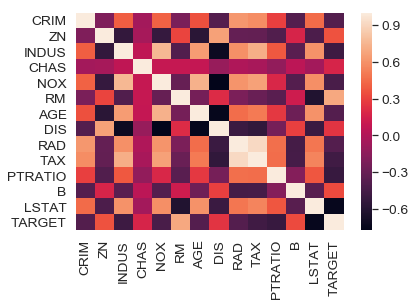

In [173]:
import seaborn as sns
#相関係数を計算
corr_matrix = W.corr()

sns.heatmap(corr_matrix)
# 目的変数と正・負の相関が高い変数をピックアップ
print(corr_matrix.nlargest(4,'TARGET')['TARGET'])
print('--------')
print(corr_matrix.nsmallest(4,'TARGET')['TARGET'])

相関が高いやつを適当にピックアップして見る。

In [174]:
W = W[["RM","TAX","LSTAT","PTRATIO","INDUS","NOX"]]
W.shape

(506, 6)

In [175]:
X2_train, X2_test, y2_train, y2_test = train_test_split(W, Z, test_size=0.2, random_state=0)

In [176]:
X2_train.shape, X2_test.shape, y2_train.shape, y2_test.shape

((404, 6), (102, 6), (404, 1), (102, 1))

In [179]:
score= []
for i in range(1,5):
    lin_n = LinearRegression(normalize=True)
    degree_n = PolynomialFeatures(degree=i)
    X_train_n = degree_n.fit_transform(X2_train)
    X_test_n = degree_n.fit_transform(X2_test)
    lin_n.fit(X_train_n, y2_train)
    score.append([i, lin_n.score(X_test_n, y2_test)])
        
score.sort(key=lambda x: x[1])
score.reverse()

print("{0[0][0]}次元　:スコア {0[0][1]}".format(score))
    

3次元　:スコア 0.7209402014725346


# 16.重回帰について記述せよ
以下の観点をすべて含めて記述しましょう。

・説明変数を増やすことでどのようなメリットがあるか  
・説明変数を増やすことでどのようなデメリットがあるか

**【回答】**  
複数の特徴で回帰分析することを「重回帰分析」といいます。

重回帰分析のメリットは、説明変数を一つしか使わない単回帰分析に比べて予想の精度が上がります。

またデメリットは、説明変数同士の相関係数が高いものを入れると精度が落ちることや、相関係数が０に近いものを入れると、精度が落ちるようです。

以下に参考になるURLの記事を記載します。
~~~~~~~~~~~~~~~~
https://xica.net/vno4ul5p/
重回帰分析を行っている際、説明変数を増やすほど決定係数が高くなりやすいため、ついついよりたくさんの説明変数を入れてしまいがちです。しかし、その際に気をつけなければならないことがあります。それが多重共線性です。

多重共線性とは、説明変数間で相関係数が高いときに、それが原因で発生する現象です。（英語で multicollinearity と言われるため、略して「マルチコ」とも呼ばれます）

多重共線性によって引き起こされる症状は、
・分析結果における係数の標準誤差が大きくなる  
・t値が小さくなる  
・決定係数が大きな値となる  
・回帰係数の符号が本来なるべきものとは逆の符号となる  
~~~~~~~~~~~~~~~~